In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from sympy import lambdify

## Un recorderis de las fórmulas y su significado

![](./imgs/image1.png)


El libro menciona que nos enfocaremos en curvas que estén parametrizadas por longitud de arco, entonces la magnitud de la velocidad es 1, es decir, $|\alpha'(s)|=1$.

- La magnitud de $\alpha'(s)$ es la velocidad de la curva y es un invariante, independiente de la orientación de la curva.

![Alt text](./imgs/image2.png)

- La derivada de $\alpha'(s)$ es la aceleración de la curva y es un invariante, independiente de la orientación de la curva.

In [2]:
# symbolic variables
t = sp.symbols('t')
R = sp.symbols('R', positive=True, real=True)

# symbolic functions
x, y, z, a, da, dda, T, k = sp.symbols('x y z a da dda T k', cls=sp.Function)
da_norma = sp.symbols('da_norma', cls=sp.Function)

Norma euclidiana:

In [3]:
def norm(x):
    return sp.sqrt(np.dot(x, x).simplify())

Círculo de radio $R$ parametrizado como curva plana en 3D

In [4]:
x = R*sp.cos(t)
y = R*sp.sin(t)
z = 0
a = (x, y, z)
a

(R*cos(t), R*sin(t), 0)

Mostremos primero como se comporta esta parametrización en $X$ únicamente.

In [5]:
x.subs(R, 3)

3*cos(t)

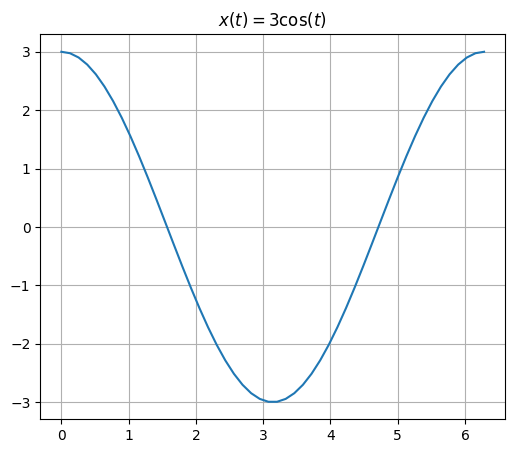

In [6]:
#angles we are going to use
w = np.linspace(0, 2*np.pi)

#turning symbolic functions into numerical functions
X = lambdify(t, x.subs(R, 3))

#plotting
plt.figure(figsize=(6, 5))
plt.plot(w, X(w))
plt.title(r'$x(t) = 3\cos(t)$')
plt.grid()
plt.show()

Ahora sí hagamos la parametrización en 2D como $X$ y $Y$.

In [7]:
w = np.linspace(0, 2*np.pi)
X = lambdify(t, x.subs(R, 3))
Y = lambdify(t, y.subs(R, 3))

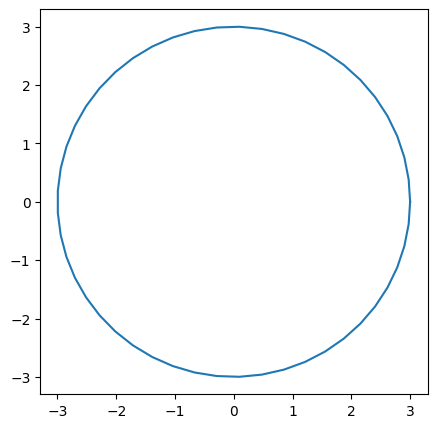

In [8]:
plt.figure(figsize=(5, 5))
plt.plot(X(w), Y(w))
plt.show()

## Vector tangente $\alpha'(t)$

In [9]:
da = (sp.diff(x, t), sp.diff(y, t), sp.diff(z, t))
da

(-R*sin(t), R*cos(t), 0)

¿Se está usando la parametrización longitud de arco? $||\alpha ' (t)|| = ?$

In [10]:
da_norma = norm(da)
da_norma

R

Solo en el caso en que R = 1...

In [11]:
da_norma.subs(R, 1)

1

## Segunda derivada $\alpha''(t)$

In [12]:
dda = (sp.diff(x, t, 2), sp.diff(y, t, 2), sp.diff(z, t, 2))
dda

(-R*cos(t), -R*sin(t), 0)

### Cálculo de la curvatura
### $\kappa(t) = \frac{||\alpha'(t) \times \alpha''(t)||}{||\alpha'(t)||^3}$

![Alt text](./imgs/image3.png)

![Alt text](./imgs/image4.png)

In [13]:
binorm_vec = np.cross(da, dda)
binorm_vec

array([0, 0, R**2*sin(t)**2 + R**2*cos(t)**2], dtype=object)

In [14]:
binom_vec_norm = norm(binorm_vec)
binom_vec_norm

R**2

In [16]:
da_norm = norm(da)
da_norm 

R

In [17]:
k = binom_vec_norm / (da_norm**3)
k

1/R